<a href="https://colab.research.google.com/github/Jojomaque/Portfolio/blob/main/Performing_statistical_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Exercise 1 - Finding measures of central tendency (max, min, mean, median) and standard deviation.
*   Exercise 2,3,4 - Performing a linear regression






In [ ]:
import pandas as pd
#read the three sheets into the dataframes county_level_df, state_level_df and income_new_df

df1 = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true')
df2 = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true', sheet_name = 'state-level')
df3 = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true', sheet_name = 'income')

display((df1['Income'].max(), df1['Income'].min()))
display((df2['Income'].max(), df2['Income'].min()))
display((df3['Income'].max(), df3['Income'].min()))



def get_income_df(county_level_df, state_level_df, income_new_df):
  #clean up the Population column of county_level_df so that it has the name Pop
  county_level_df['Pop'] = county_level_df['Population']
  county_level_df.drop('Population', axis = 1)

  state_level_df['Pop'] = state_level_df['Pop']/1000

  combined_df = pd.concat([county_level_df, state_level_df], join='inner', ignore_index=True)
  final_df = combined_df.append(income_new_df, ignore_index=True)
  return final_df.sort_values(by=['Income'], ascending=False)


# answer = get_income_df(df1, df2, df3)
# display(answer.shape)
# display(answer.head(1))
#display(answer.tail(1))

# answer
#dif answer to test output

(81, 22)

(78, 35)

(78, 35)

### Exercise 1 -  Finding measures of central tendency (max, min, mean, median) and standard deviation.
            group by state and calculate statistics

Run the function get_income_df() and store the result in a new dataframe called **income_df**.

Group income_df by State and calculate some statistics on the groups.

Add a description, in the cell below, of what the statistics show and why in the text box.

In [ ]:
income_df = get_income_df(df1, df2, df3)
grouped1 = income_df.groupby('State').agg({'Age': ['mean', 'min', 'max']}).reset_index()
grouped2 = income_df.groupby('State').agg({'Income': ['mean', 'min', 'max', 'median', 'std']}).reset_index()
display(grouped1)
display(grouped2)

#shows the mean, min and max age in each state.
#shows the mean, min and max income in each state.


# income_df

State        Age        
              mean min max
0    CA  33.000000  29  35
1    IN  38.000000  32  41
2    MD  28.076923  22  41
3    NY  32.333333  29  34
4    TX  34.181818  23  42

State     Income                          
              mean min max median        std
0    CA  66.333333  54  78     67  12.013881
1    IN  46.333333  35  69     35  19.629909
2    MD  64.230769  22  81     69  16.931991
3    NY  74.333333  67  78     78   6.350853
4    TX  59.454545  45  75     62   9.668129

The GroupBy function in Python allows me to split the data set into separate groups to analyse a particular subset.
The agg() enables me to perform several statistical analysis at the same time.
Grouped1 Shows the mean, min and max age in each state and
Grouped2 Shows the mean, min and max and median income in each state. From this data analysis we can see that the State of Indiana has the highest mean age and the lowest mean income.

I have performed the std() standard deviation on income values per state. 
The high standard deviation of the Income in Indiana indicates that the data points are spread out over a large range of values and not clustered around the mean.

### Exercise 2 - Performing Linear Regression
                Is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  calculate and display **r_squared** from rvalue (`regression.rvalue`)  
(*Expected output:  0.021866754112003717 - this value is used to calculate R squared, the correlation coefficient which indicates how closely the that there is a very weak correlation between Age and Income.  The negative value of rvalue indicates that any correlation is inverse, ie as Age goes up, Income goes down*) 

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)

0.021866754112003717

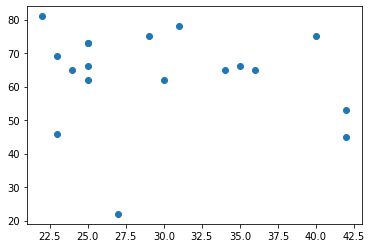

In [ ]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name = "county-level")
county_level_df.head()
# complete the lines of code (reference the instructions above)
x = county_level_df['Age']
y = county_level_df['Income']
regression = linregress(x,y)
display(regression)
# # display the slope
regression.slope
# # display the intercept
regression.intercept
# # display the r value
regression.rvalue
r_squared = regression.rvalue ** 2
display(r_squared)
#Weak negative correlation


plt.scatter(x, y)
plt.show()



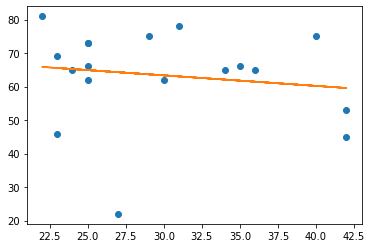

In [ ]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name = "county-level")
county_level_df.head()
# complete the lines of code (reference the instructions above)
x = county_level_df['Age']
y = county_level_df['Income']

plt.plot(x, y, 'o')



m, b = np.polyfit(x, y, 1)



plt.plot(x, m*x + b)

plt.show()

Exercise 3 - Performing Linear Regression
            Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Test output**:   
0.013558605755058871


-0.31433084434233205

72.78388856978748

-0.14787411576068246

0.4507725540176983

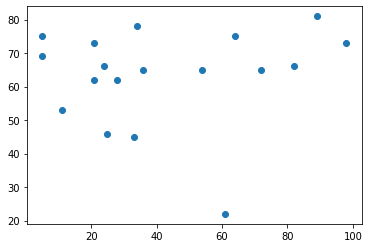

In [ ]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name = "county-level")
county_level_df.head()
# complete the lines of code (reference the instructions above)
x = county_level_df['Population']
y = county_level_df['Income']
# regression = linregress(x,y)
# display(regression)
# # display the slope
display(regression.slope)
# # display the intercept
display(regression.intercept)
# # display the r value
display(regression.rvalue)
rsqu = regression.rvalue **2
display(r_sq)
plt.scatter(x, y)
plt.show()

#This is a weak positive correlation

This is a weak positive correlation

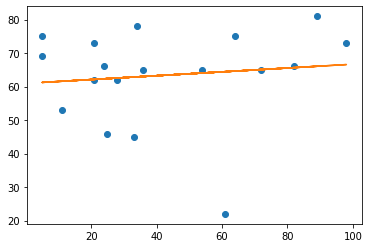

In [ ]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name = "county-level")
county_level_df.head()
# complete the lines of code (reference the instructions above)
x = county_level_df['Population']
y = county_level_df['Income']


plt.plot(x, y, 'o')



m, b = np.polyfit(x, y, 1)



plt.plot(x, m*x + b)

plt.show()


### Exercise 4 - Performing Linear Regression
              Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [ ]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)
df

x = df['Wellbeing']
y = df['Stress']

regression = linregress(x,y)
display(regression)

#  display the slope
the_slope = regression.slope
#  display the intercept
the_intercept = regression.intercept
#  display the r value
the_regression = regression.rvalue # coefficient determination (pearson) . measures the strength of the linear relationship between Stress and Wellbeing.
the_regression
r_sq = the_regression ** 2
r_sq # represents the % variation in the variable Stress that is explained by the independant variable wellbeing

LinregressResult(slope=-0.7178992620740611, intercept=38.9702526604677, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.1222745983201931)

0.4507725540176983

In [ ]:
!pip install pingouin

     |████████████████████████████████| 204kB 5.9MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.11-cp37-none-any.whl size=203325 sha256=66a20686a9de2e591fe5db79eba75163ccbbbc31b2fae993eb3546991e545f96
  Stored in directory: /root/.cache/pip/wheels/79/46/ef/e377eb45c86f278f660d31c4a30e3f733063d28c89462f1aea
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=dcb1c8b7e78370326a8fc15e5af6979ed1edc5d5b2bc2d637f7910f8d167a0f5
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [ ]:
import pandas as pd
import pingouin as pg

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)
df
pg.corr(x=df['Stress'], y=df['Wellbeing'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,44,-0.671396,"[-0.81, -0.47]",0.450773,0.423981,6.084541e-07,3.153e+04,0.999507


The relationship between Stress and Well being.
A strong downhill (negative) linear relationship.